# PCEN on Multi-Axis data

In this notebook, we check whether the PCEN function work on multi-axis data

## Step 1: Import libraries

In [1]:
import numpy as np
from caits.visualization import plot_spectrogram
from caits.fe import (
    spectrogram,
    melspectrogram,
    pcen,
    pcen_base
)

## Step 2: Initialize data

In [2]:
# Parameters
sample_rate = 1000
duration = 1.0
n_fft = 200
hop_length = 100
n_channels = 2

# Generate time axis and multichannel signal: shape (samples, channels)
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ch1 = np.sin(2 * np.pi * 50 * t)                   # 5 Hz sine wave
ch2 = np.sin(2 * np.pi * 100 * t + np.pi)          # 10 Hz sine with phase shift
ch3 = np.sin(2 * np.pi * 200 * t + np.pi)          # 15 Hz sine with phase shift
data = np.stack((ch1, ch2, ch3), axis=-1)              # shape: (1000, 2)

data.shape


(1000, 3)

In [3]:
specs, f = spectrogram(y=data, n_fft=n_fft, hop_length=hop_length)
specs.shape

(3, 101, 11)

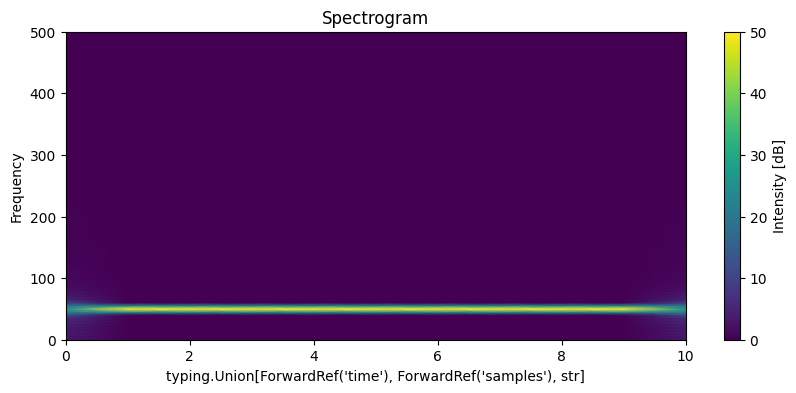

In [4]:
f = np.fft.rfftfreq(200, 1 / sample_rate)
x = np.arange(specs.shape[2])

plot_spectrogram(
    spec=specs[0],
    f=f,
    x=x,
    return_mode=False
)

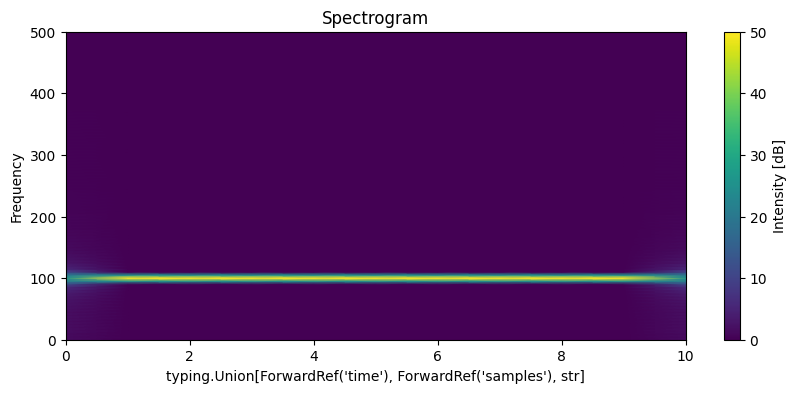

In [5]:
plot_spectrogram(spec=specs[1], f=f, x=x ,return_mode=False)

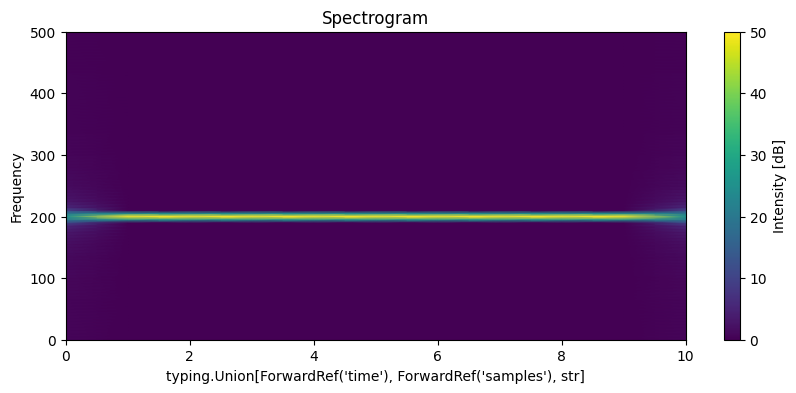

In [6]:
plot_spectrogram(spec=specs[2], f=f, x=x, return_mode=False)

## Step 3: PCEN on spectrograms

In [7]:
pcen_sig = pcen(specs, sample_rate)
pcen_sig.shape

(3, 101, 11)

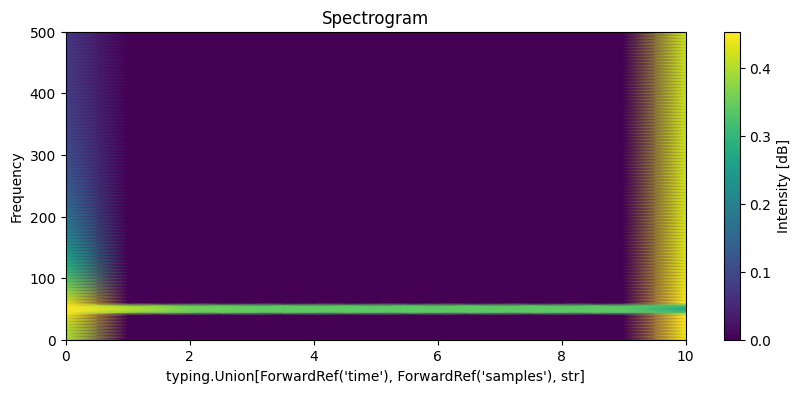

In [8]:
plot_spectrogram(spec=pcen_sig[0], f=f, x=x, return_mode=False)

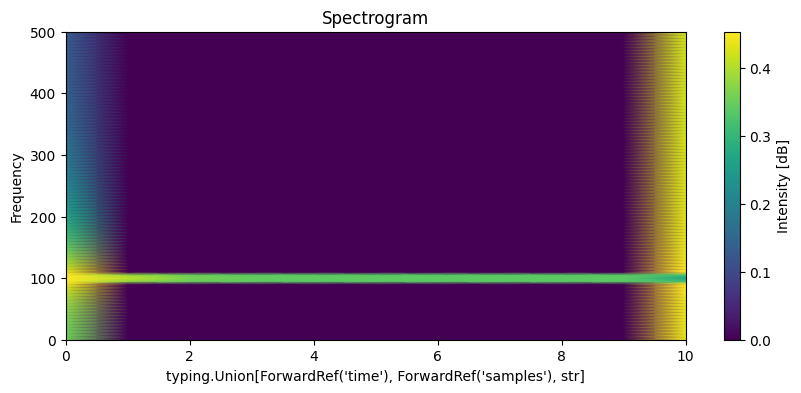

In [9]:
plot_spectrogram(spec=pcen_sig[1], f=f, x=x, return_mode=False)

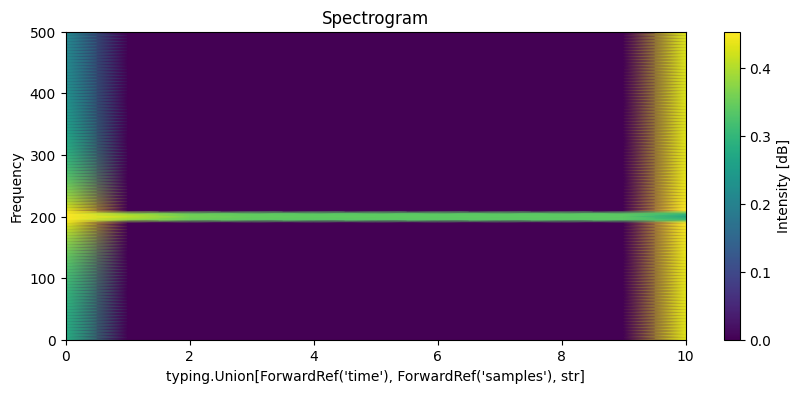

In [10]:
plot_spectrogram(spec=pcen_sig[2], f=f, x=x, return_mode=False)


## Step 4: PCEN on Mel Spectrograms

In [11]:
mels = melspectrogram(y=data, n_fft=n_fft, hop_length=hop_length)
mels.shape

/home/AIoT01/DEV/crossai/crossai-ts/caits/fe/_spectrum.py:127: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = mel_filter(sr=sr, n_fft=n_fft, **kwargs)


(3, 128, 11)

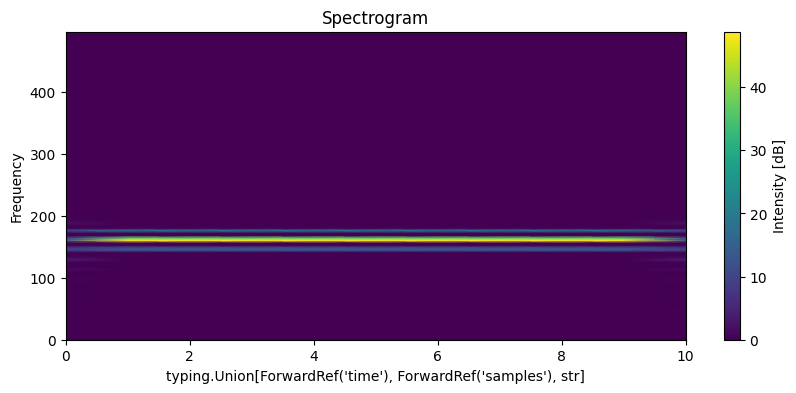

In [12]:
f = np.fft.rfftfreq(255, 1 / sample_rate)
x = np.arange(mels.shape[2])

plot_spectrogram(spec=mels[0], f=f, x=x, return_mode=False)

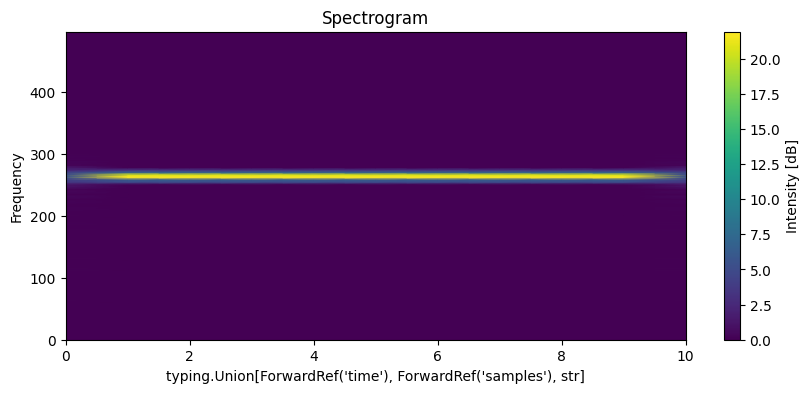

In [13]:
plot_spectrogram(spec=mels[1], f=f, x=x, return_mode=False)

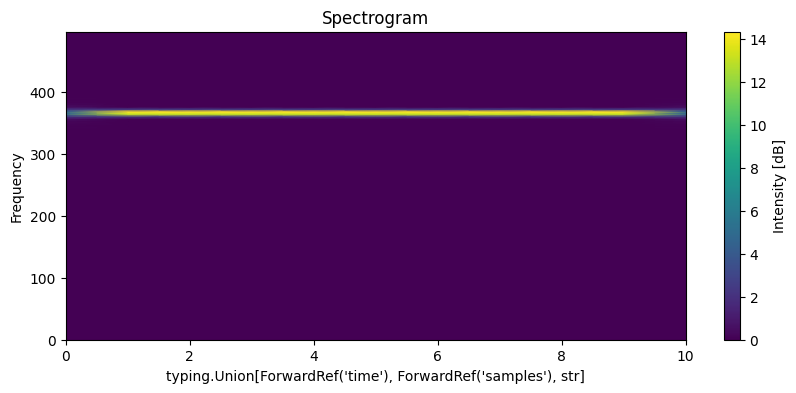

In [14]:
plot_spectrogram(spec=mels[2], f=f, x=x, return_mode=False)

In [15]:
pcen_mels = pcen_base(mels)
pcen_mels.shape

(3, 128, 11)

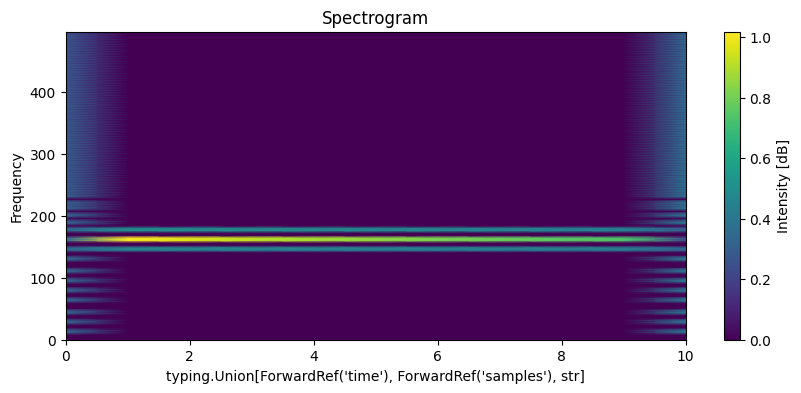

In [16]:
plot_spectrogram(spec=pcen_mels[0], f=f, x=x, return_mode=False)

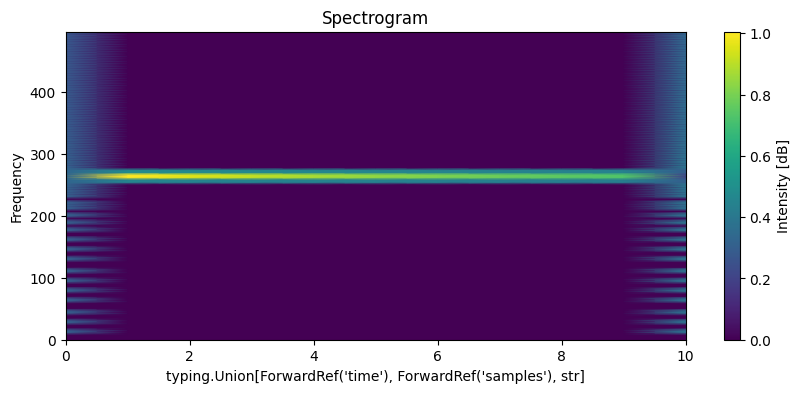

In [17]:
plot_spectrogram(spec=pcen_mels[1], f=f, x=x, return_mode=False)

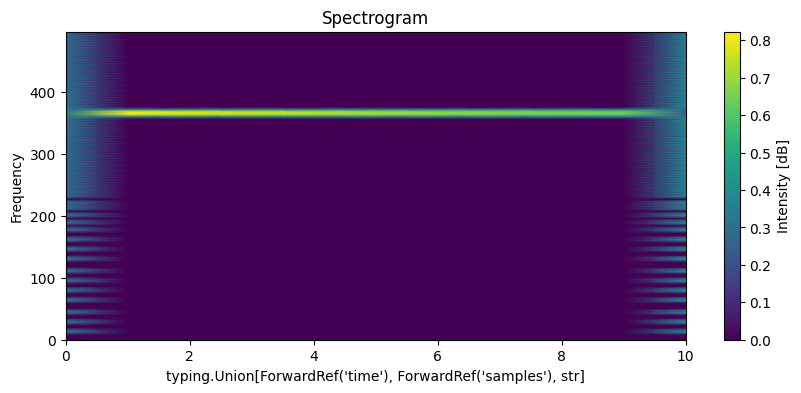

In [18]:
plot_spectrogram(spec=pcen_mels[2], f=f, x=x, return_mode=False)

# Real-world data

## Load audio sample

In [19]:
from IPython.display import Audio
from caits.loading import wav_loader, wav_specs_check

print(wav_specs_check("data/jmp-last-night.wav"))
audio_specs = wav_specs_check("data/jmp-last-night.wav")

audio_stereo, sample_rate = wav_loader("data/jmp-last-night.wav")
print(f"shape: {audio_stereo.shape} - Sampling rate: {sample_rate}")
Audio(audio_stereo.values.T, rate=sample_rate)

{'nchannels': 2, 'sampwidth': 2, 'framerate': 44100, 'nframes': 605391, 'comptype': 'NONE', 'compname': 'not compressed'}
shape: (605391, 2) - Sampling rate: 44100


In [20]:
audio_arr = audio_stereo.values

In [21]:
N_FFT = 200
HOP_LENGTH = 100

## Calculate spectrograms

In [22]:
spectrograms, f = spectrogram(y=audio_arr, n_fft=N_FFT, hop_length=HOP_LENGTH)

In [23]:
f = np.fft.rfftfreq(N_FFT, 1 / sample_rate)
x = np.arange(spectrograms.shape[2])

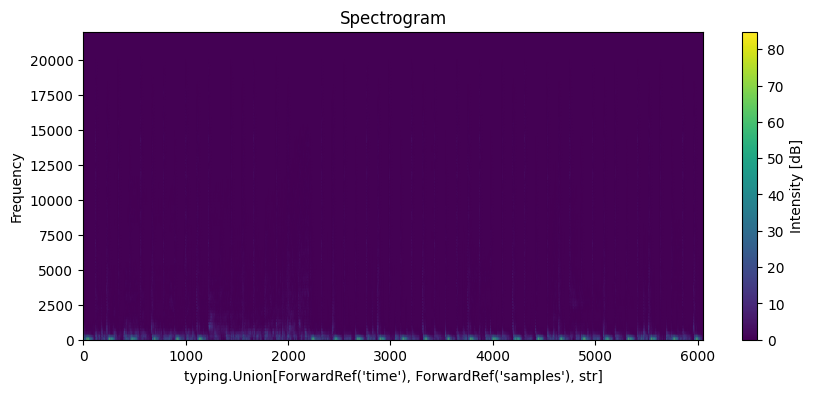

In [24]:
plot_spectrogram(spec=spectrograms[0], f=f, x=x ,return_mode=False)

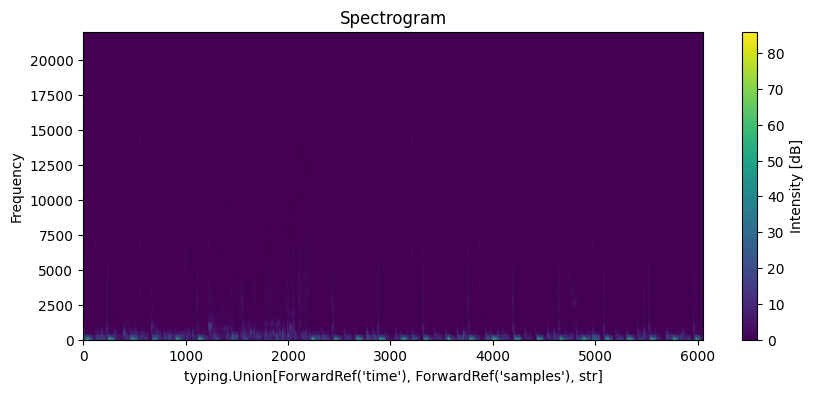

In [25]:
plot_spectrogram(spec=spectrograms[1], f=f, x=x ,return_mode=False)

## PCEN

In [26]:
pcen_audio = pcen(spectrograms, sample_rate)
pcen_audio.shape

(2, 101, 6054)

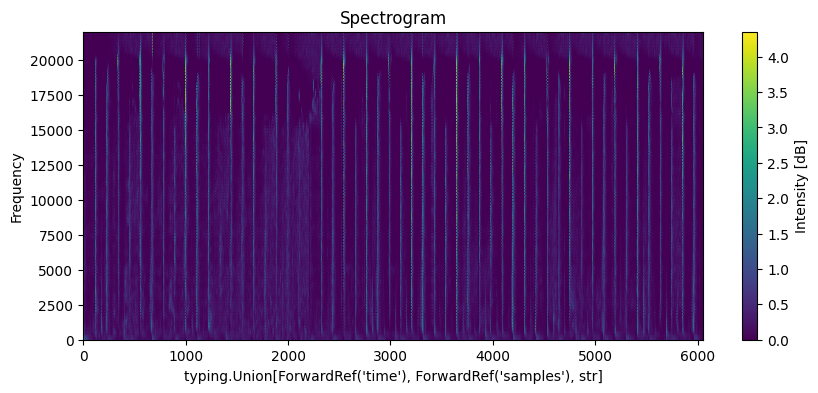

In [27]:
plot_spectrogram(spec=pcen_audio[0], f=f, x=x, return_mode=False)

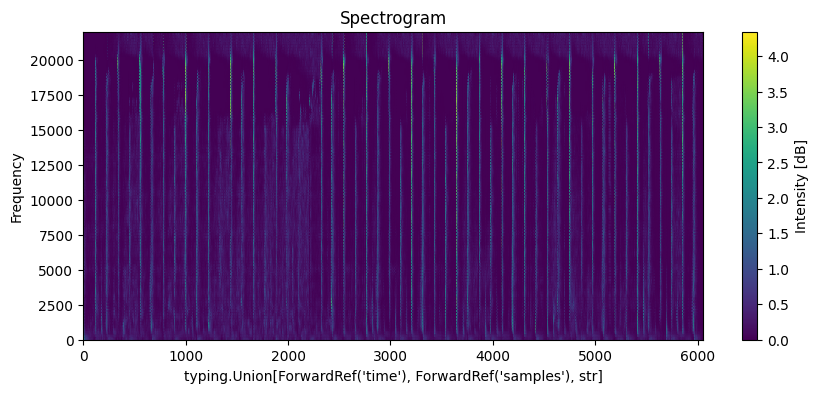

In [28]:
plot_spectrogram(spec=pcen_audio[1], f=f, x=x, return_mode=False)